# 04. Seaborn

### Objectives
* Seaborn makes beautiful plots with concise syntax
* Seaborn (mostly) requires tidy data
* Seaborn integrates directly with pandas DataFrames
* Use matplotlib for customized plots
* Know how to use pandas **`plot`** method to easily make plots
* Seaborn has two broad types of plots: axes (simple) and grid (complex and composed of multiple axes plot)
* Know the difference between categorical and regression variables and plots
* Know how to add dimensionality with **hue, col, row** seaborn plotting parameters

### Prepare for this lesson
* Visit the [seaborn home page](http://seaborn.pydata.org/index.htm) and read the [introduction](http://seaborn.pydata.org/introduction.html#introduction)
* Reference the [seaborn tutorial](http://seaborn.pydata.org/tutorial.html) which has excellent documentation on how to use all of the seaborn plotting functions.
* Keep the [Seaborn API page](http://seaborn.pydata.org/api.html) open throughout the notebook
* Read the [pandas visualization docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

### Objectives


This notebook will dive into the Seaborn visualization library in Python. This notebook assumes no previous visualization knowledge.

The [Python Seaborn library](http://seaborn.pydata.org/index.html) is a high-level, easy-to-use interface for creating powerful and beautiful visualizations. Seaborn does not actually perform any of the visualizations but instead, calls the primary Python visualization library, matplotlib, to do all the heavy lifting. Sometimes, Seaborn is referred to as a **wrapper** for matplotlib, which is a more difficult library to use but provides more fine-grained control.

The Seaborn documentation is excellent and you well be well-served to read all of it. The library is fairly minimal and only exposes a relatively few amount of functions. I suggest you start with plotting sections of the [seaborn tutorial](http://seaborn.pydata.org/tutorial.html#). The tutorial separates out the plotting functions into three separate sections - distributions, linear relationships, and categorical data.

## Seaborn integration with Pandas
All Seaborn plotting functions contain a **`data`** parameter that accepts a pandas DataFrame. This allows you to use the **string names** of the column names for the other arguments in the plotting functions.

## Seaborn and Tidy data
Seaborn plotting functions work best with tidy data. Tidy data makes plotting with seaborn incredibly easy.

## The four common Seaborn plotting function parameters - `x`, `y`, `hue`, and `data`
The Seaborn API is easy to use and most of the plotting functions look very similar. They syntax will look like this:

```sns.plotting_func(x='col1', y='col2', hue='col3', data=df)```

You will always pass your DataFrame to the `data` parameter. For the univariate plot, you can use exactly one of `x` and `y`. The `hue` parameter adds an extra level of dimensionality by splitting and coloring the data by a third variable. For 

## Getting started with Axes plots for Univariate visualization
Let's begin by making plots with a single dimension of data.

[1]: http://seaborn.pydata.org/api.html

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date', 'job_date'])
emp['experience'] = 2016 - emp['hire_date'].dt.year
emp.head()

,title,dept,salary,race,gender,hire_date,job_date,experience
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13,10
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18,16
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03,1
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25,34
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22,27


In [3]:
emp['experience_level'] = pd.cut(emp['experience'], 
                                 bins=[0, 5, 15, 100], 
                                 labels=['Novice', 'Experienced', 'Veteran'])
emp.head()

,title,dept,salary,race,gender,hire_date,job_date,experience,experience_level
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13,10,Experienced
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18,16,Veteran
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03,1,Novice
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25,34,Veteran
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22,27,Veteran


### Univariate numerical plots
A few of the plots work with just a single dimension of data. Pass the DataFrame to the **`data`** parameter. Let's create a boxplot. Most Seaborn methods have both an **`x`** and **`y`** parameter. For some plots you only need to specify one of them.

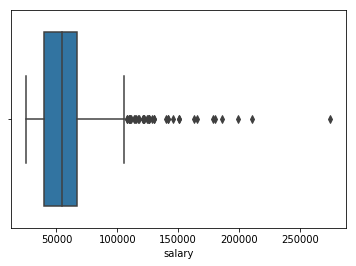

In [4]:
sns.boxplot(x='salary', data=emp)

Make the boxplot vertical by passing using **`y`**.

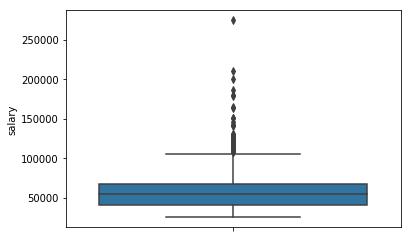

In [5]:
sns.boxplot(y='salary', data=emp)

### Violin plot
Violin plots help you visualize a distribution and work with just single dimensions of data.

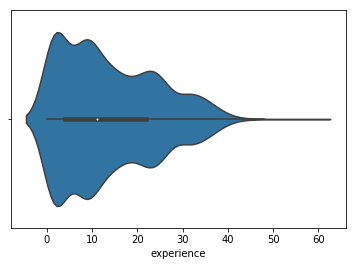

In [6]:
sns.violinplot('experience', data=emp)

### String Data
String data cannot be visualized with the above plots. We can assign the returned matplotlib Axes to a variable and then modify our plot. This is doing the same thing as `emp['race'].value_counts()` in Pandas.

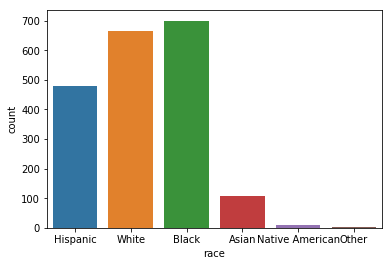

In [7]:
ax = sns.countplot('race', data=emp)

Seaborn plots return the underlying axes. We can assign this returned object to a variable and use it to modify our plots.

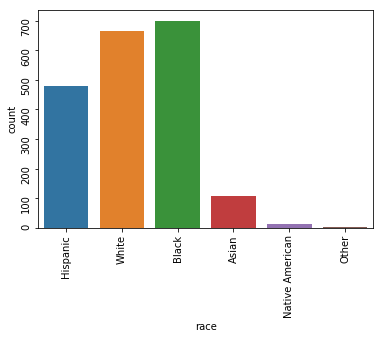

In [8]:
ax.tick_params(rotation=90)
ax.figure

### KDE and Histogram
The **`distplot`** function plots both the KDE and the histogram together. There is no **`data`** parameter here, so you must pass in the Series directly.

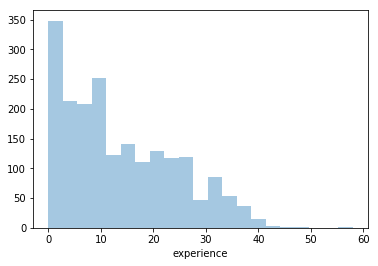

In [65]:
sns.distplot(emp['experience'], kde=False)

# Multivariate plotting
The above plots all contained a single plot. We will add another dimension to our data by using both `x` and `y` parameters.

### Mixing a categorical feature
All the plots below use one categorical column and one numeric column. Seaborn **aggregates** the data for us. Let's find the average salary by gender using many different plots.

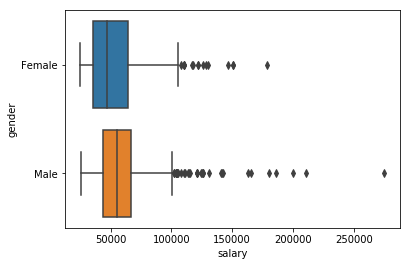

In [10]:
sns.boxplot(x='salary', y='gender', data=emp)

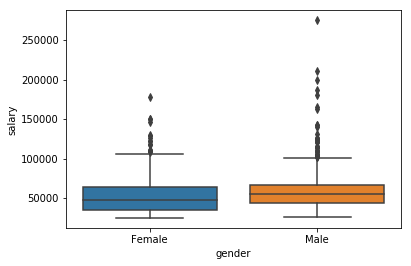

In [11]:
sns.boxplot(x='gender', y='salary', data=emp)

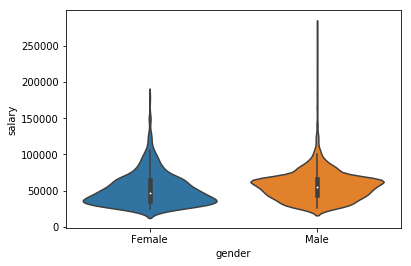

In [12]:
sns.violinplot(x='gender', y='salary', data=emp)

By default, the bar plot takes the average

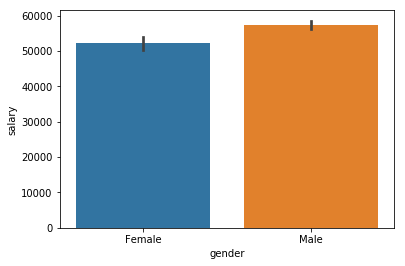

In [13]:
sns.barplot(x='gender', y='salary', data=emp)

Can change aggregation but Seaborn does not accept strings. Must use NumPy.

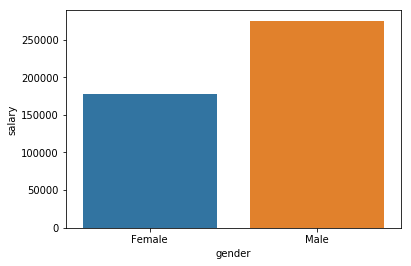

In [30]:
sns.barplot(x='gender', y='salary', data=emp, estimator=np.max, ci=0) # get rid of the balck bar 

## Multivariate numeric
We now turn to plotting two numeric variables. Scatter and line plots are the most common.

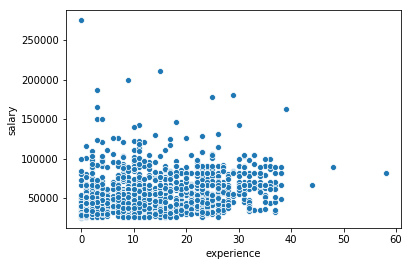

In [15]:
sns.scatterplot(x='experience', y='salary', data=emp)

The **`regplot`** function draws the regression line through the points.

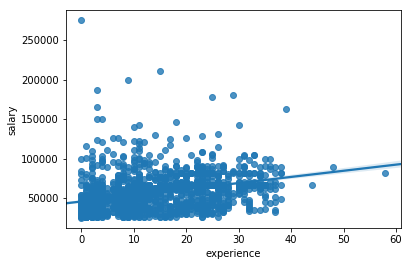

In [16]:
sns.regplot(x='experience', y='salary', data=emp)

# Add another dimension with `hue`
The `hue` parameter is found in most seaborn methods and allows you slice the data by one more dimension. The **`hue`** parameter does not create a new Axes, rather, it slices the data in the current Axes.

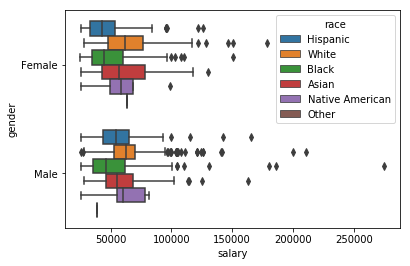

In [17]:
sns.boxplot(x='salary', y='gender', hue='race', data=emp)

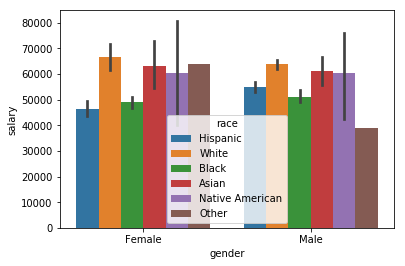

In [18]:
sns.barplot(x='gender', y='salary', hue='race', data=emp)

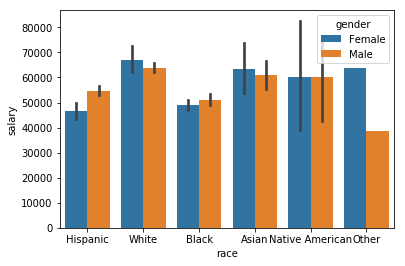

In [19]:
ax = sns.barplot(x='race', y='salary', hue='gender', data=emp)

# Add more Axes with the Grid plots
There are only a few Grid plots and for them, you will need to specify the name of the underlying Seaborn Axes plot you would like. **`catplot`** is one of the Grid plots.

#### By default, the `catplot` does a `stripplot`

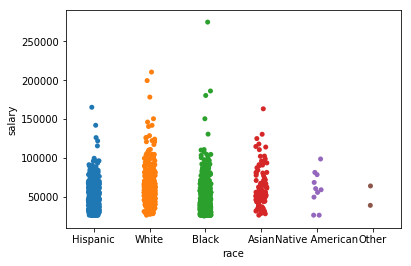

In [20]:
sns.stripplot(x='race', y='salary', data=emp)

Notice how the below plot is the same as the above.

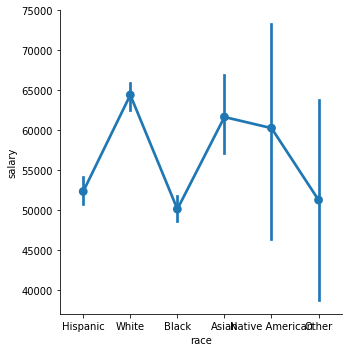

In [35]:
sns.catplot(x='race', y='salary', data=emp, kind='point')

## Use `col` or `row` to create the Grid
If you plot more than one Axes with Seaborn you have created a grid. Use the **`col`** or **`rol`** parameter to specify the column you would like to slice the data with.

The following plot has 

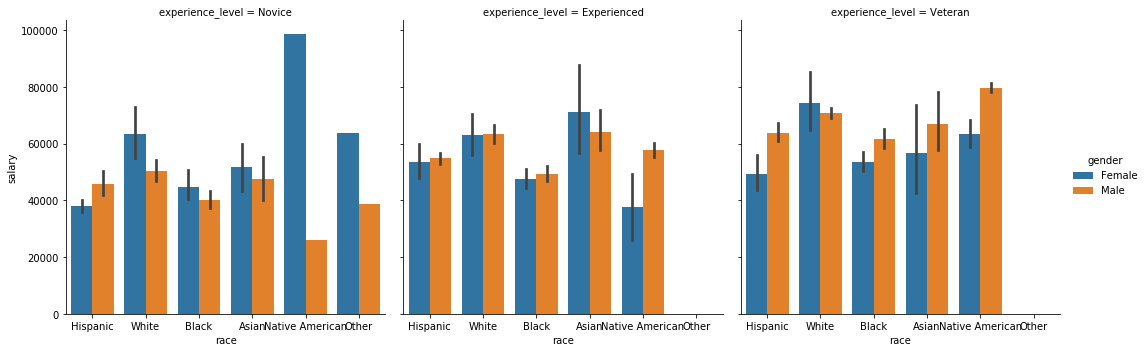

In [22]:
sns.catplot(x='race', y='salary', hue='gender', data=emp, kind='bar', col='experience_level')

## Use both `row` and `col` for maximum level of slicing
You can use the **`row`** variable as well to further slice the data. The following filters for the top 5 departments and then calculates bar plots for each combination of department, experience level, race, and gender.

In [23]:
top5 = emp['dept'].value_counts().index[:5]
filt = emp['dept'].isin(top5)
emp2 = emp[filt]

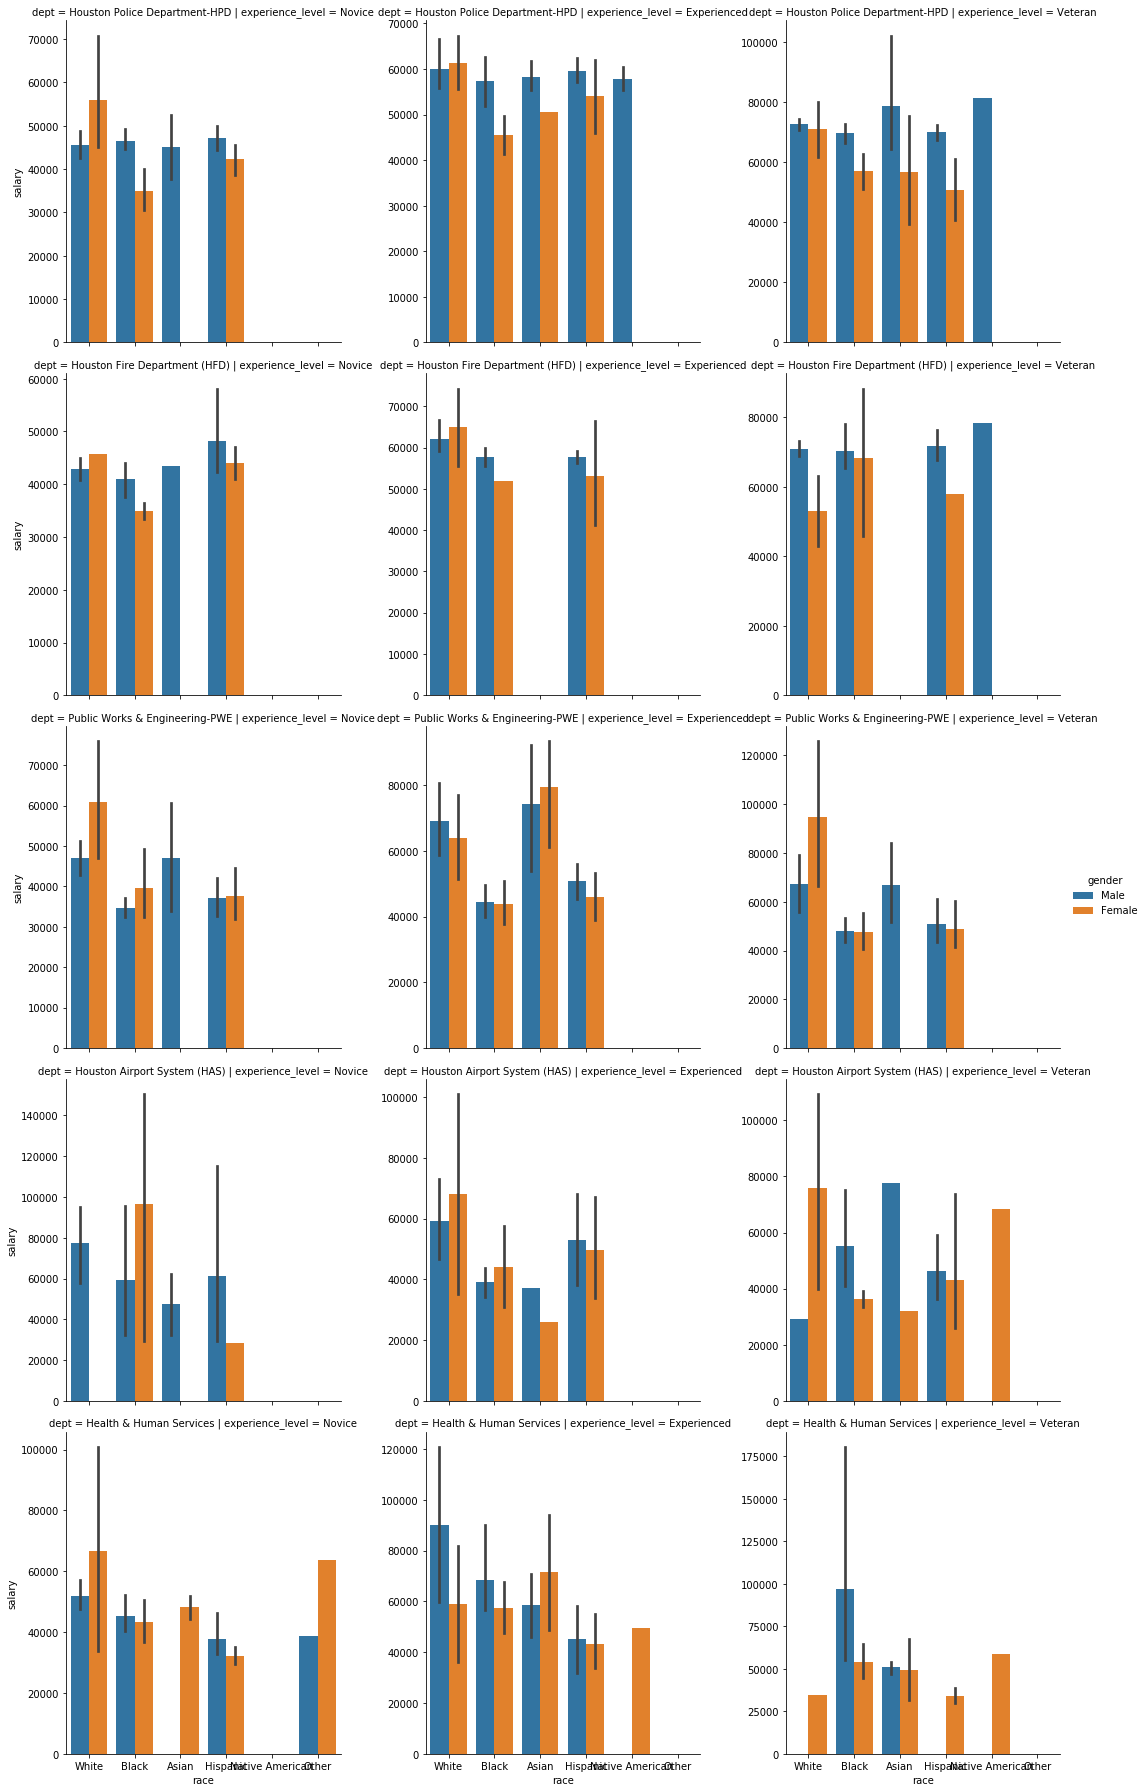

In [36]:
sns.catplot(x='race', y='salary', hue='gender', 
            data=emp2, kind='bar', col='experience_level', row='dept', sharey=False)

## Matrix plots
Let's open up the Mini Web App Finding Similar Members with the Meetup API notebook.

# Exercises

### Problem 1
<span  style="color:green; font-size:16px">Using Seaborn, plot the number of schools per state.</span>

In [39]:
college = pd.read_csv('../data/college.csv')
college.head()

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,...,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


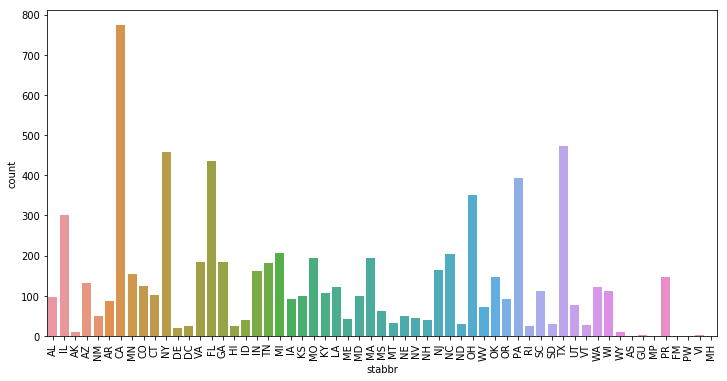

In [43]:

ax = sns.countplot('stabbr', data=college)
ax.figure.set_size_inches(12, 6)
ax.tick_params(axis='x', rotation = 90)

### Problem 2
<span  style="color:green; font-size:16px">Use pandas to create the same plot from problem 1, but make it an ordered horizontal bar chart.</span>

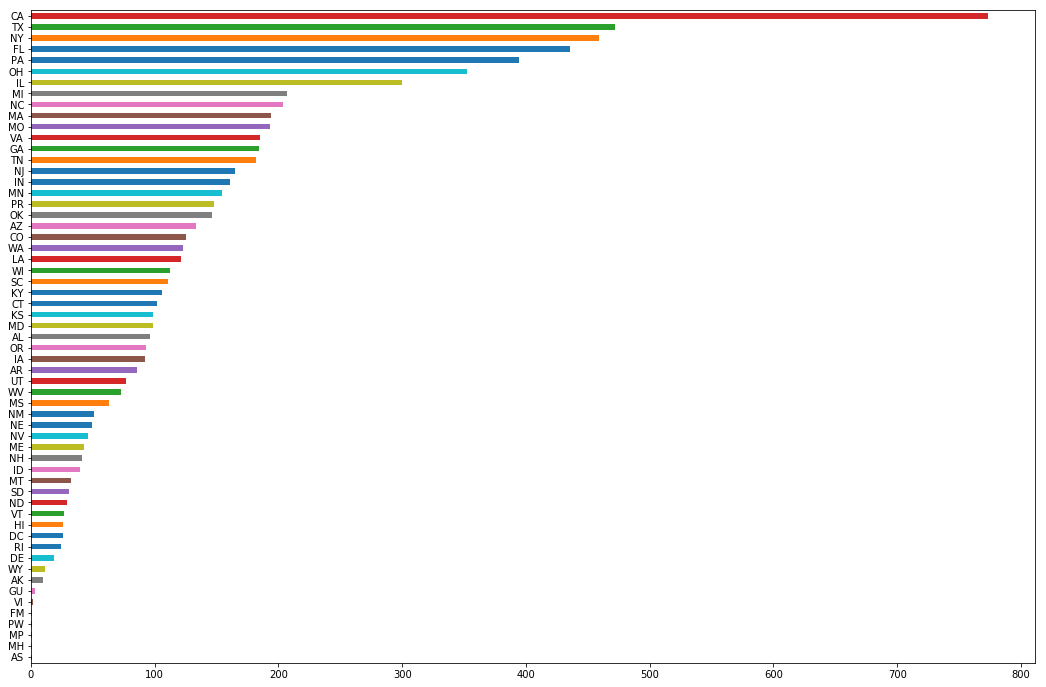

In [50]:
# your code here
college['stabbr'].value_counts(ascending = True).plot(kind='barh', figsize=(18,12))

### Problem 3
<span  style="color:green; font-size:16px">Make a boxplot per state of SAT Math.</span>

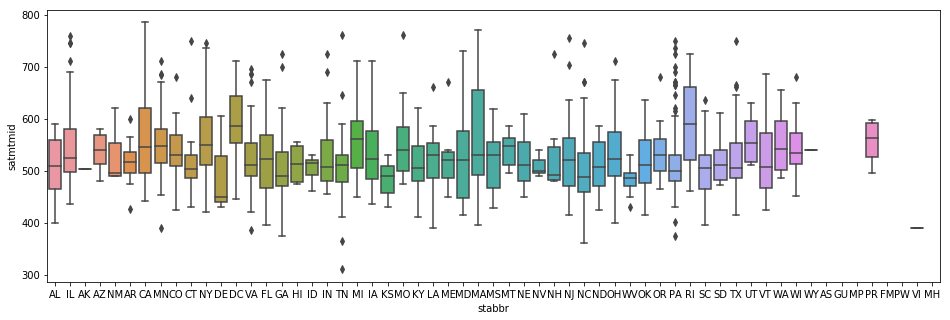

In [57]:
# your code here
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x='stabbr', y='satmtmid', data=college, ax=ax)

### Problem 4
<span  style="color:green; font-size:16px">Draw the relationship between SAT Math and Verbal scores with a regression line.</span>

In [58]:
pd.read_csv('../data/college_data_dictionary.csv')  

,column_name,description
0,instnm,Institution Name
1,city,City Location
2,stabbr,State Abbreviation
3,hbcu,Historically Black College or University
4,menonly,0/1 Men Only
5,womenonly,0/1 Women only
6,relaffil,0/1 Religious Affiliation
7,satvrmid,SAT Verbal Median
8,satmtmid,SAT Math Median
9,distanceonly,Distance Education Only


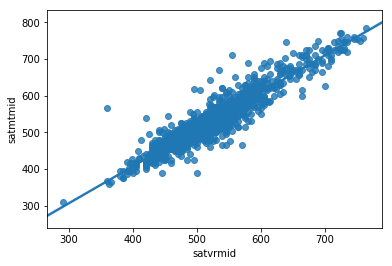

In [63]:
# your code here satvrmid, satmtmid
sns.regplot(x='satvrmid', y='satmtmid', data=college)


# Ask questions that you can answer with Seaborn
Use the insurance dataset:

In [66]:
emp

,title,dept,salary,race,gender,hire_date,job_date,experience,experience_level
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13,10,Experienced
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18,16,Veteran
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03,1,Novice
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25,34,Veteran
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22,27,Veteran
5,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26,2005-03-26,32,Veteran
6,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26,2012-03-26,4,Novice
7,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04,2013-11-04,3,Novice
8,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Public Works & Engineering-PWE,107962.0,White,Male,1993-11-15,2013-01-05,23,Veteran
9,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616.0,NaN,Male,2016-03-14,2016-03-14,0,NaN


In [70]:
emp.dropna().shape

(1809, 9)

In [73]:
emp.dropna(subset=['salary']).shape
emp.fillna({'salary':0}).isna().sum()

title                0
dept                 0
salary               0
race                35
gender               0
hire_date            0
job_date             3
experience           0
experience_level    84
dtype: int64

In [89]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [87]:
plt.style.use('ggplot')


matplotlib.axes._subplots.AxesSubplot

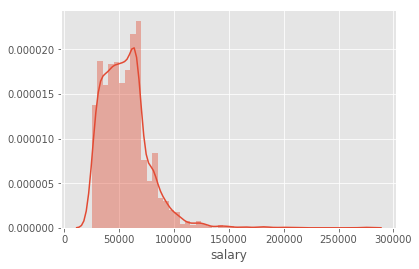

In [88]:
ax = sns.distplot(emp['salary'].dropna())
type(ax)